<a href="https://colab.research.google.com/github/fillerInk/colab_notebooks/blob/master/kili_poyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [0]:
import sys
import time
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
import torchvision.transforms as transforms
from torchvision import models

In [7]:
if torch.cuda.is_available():
    dev = "cuda:0"  # Gpu
else:
    dev = "cpu"
device = torch.device(dev)
print(dev)

cuda:0


In [11]:
data_dir = '/content/drive/My Drive/kili'

for dir in os.listdir(data_dir):
  print(dir)

test
train


206240591.jpg


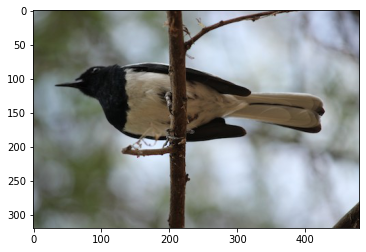

In [12]:
for dir in os.listdir(data_dir):
  for image in os.listdir(data_dir+'/'+dir):
    print(image)
    plt.imshow(Image.open(data_dir+'/'+dir+'/'+image))
    break
  break

In [35]:
transform = transforms.Compose(
    [transforms.Resize((100,100)),
     transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)


trainset = torchvision.datasets.ImageFolder(root="/content/drive/My Drive/newkili/train/", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, num_workers=0, shuffle=True)

testset = torchvision.datasets.ImageFolder(root="/content/drive/My Drive/newkili/test/", transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, num_workers=0, shuffle=False)

dataloaders = {
    "train": trainloader,
    "test": testloader
}
datasizes = {
    "train": len(trainset),
    "test": len(testset)
}
CLASSES = list(trainset.class_to_idx.keys())
print('Classes are ')
print(CLASSES)
print(" ")
print('datasizes are ')
print(datasizes)
print(" ")
print("dataloaders are")
print(dataloaders)

Classes are 
['hornbill', 'robin', 'thrash']
 
datasizes are 
{'train': 348, 'test': 87}
 
dataloaders are
{'train': <torch.utils.data.dataloader.DataLoader object at 0x7fca4dbd5438>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7fca45a06668>}


In [0]:
def train_model(model, criterion, optimizer, scheduler, epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(epochs):
        print("Epoch {}/{}".format(epoch, epochs-1))
        print("-"*10)
        
        for phase in ["train", "test"]:
            if phase == "train":
                model.train()
            else:
                model.eval()
            running_loss = 0.0
            running_corrects = 0 
            
            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # Zero the parametsrs
                optimizer.zero_grad()
                
                # Forward
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == "train":
                        loss.backward()
                        optimizer.step()
                    
                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == "train":
                scheduler.step()
            
            epoch_loss = running_loss / datasizes[phase]
            epoch_acc = running_corrects.double()/datasizes[phase]
            
            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))
            if(phase == "test" and epoch_acc > best_acc):
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print()
    
    time_elapsed = time.time() - since
    print("Training complete in {:0f}m {:0f}s".format(time_elapsed//60, time_elapsed%60))
    print("Best val Acc: {}:4f".format(best_acc))
    
    # load best model parameters
    model.load_state_dict(best_model_wts)
    return model

In [0]:
model_ft = models.resnet18(pretrained=True)

# turn training false for all layers, other than fc layer
for param in model_ft.parameters():
    param.requires_grad = False
    
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(CLASSES))
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.003, momentum=0.9)
exp_lr_sc = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [42]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_sc, epochs=25)

Epoch 0/24
----------
train Loss: 0.2312 Acc: 0.9425
test Loss: 0.4526 Acc: 0.8391

Epoch 1/24
----------
train Loss: 0.2363 Acc: 0.9195
test Loss: 0.4571 Acc: 0.8391

Epoch 2/24
----------
train Loss: 0.2413 Acc: 0.9310
test Loss: 0.4624 Acc: 0.8391

Epoch 3/24
----------
train Loss: 0.2510 Acc: 0.9224
test Loss: 0.4644 Acc: 0.8391

Epoch 4/24
----------
train Loss: 0.2367 Acc: 0.9368
test Loss: 0.4609 Acc: 0.8391

Epoch 5/24
----------
train Loss: 0.2530 Acc: 0.9253
test Loss: 0.4627 Acc: 0.8276

Epoch 6/24
----------
train Loss: 0.2324 Acc: 0.9339
test Loss: 0.4634 Acc: 0.8161

Epoch 7/24
----------
train Loss: 0.2312 Acc: 0.9425
test Loss: 0.4645 Acc: 0.8161

Epoch 8/24
----------
train Loss: 0.2353 Acc: 0.9310
test Loss: 0.4642 Acc: 0.8276

Epoch 9/24
----------
train Loss: 0.2535 Acc: 0.9167
test Loss: 0.4622 Acc: 0.8161

Epoch 10/24
----------
train Loss: 0.2324 Acc: 0.9425
test Loss: 0.4629 Acc: 0.8276

Epoch 11/24
----------
train Loss: 0.2291 Acc: 0.9397
test Loss: 0.4639 Acc

In [0]:
def imshowaxis(ax, img, orig, pred):
    img = img / 2 + 0.5
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    if orig != pred:
        ax.set_title(orig + "\n" + pred, color="red")
    else:
        ax.set_title(orig + "\n" + pred)
    ax.axis("off")


def vis_model(model, num_images=25):
    was_training = model.training
    model.eval()
    images_so_far = 0
    figure, ax = plt.subplots(6, 6, figsize=(20, 20))
    
    
    with torch.no_grad():
        for i , (inputs, labels) in enumerate(dataloaders["test"]):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            for i in range(6):
                for j in range(6):
                    if images_so_far < num_images:
                        imshowaxis(ax[i][j], inputs.cpu().data[images_so_far], CLASSES[labels[images_so_far]], CLASSES[preds[images_so_far]])
                    else:
                        model.train(mode=was_training)
                        return
                    images_so_far += 1
        model.train(mode=was_training)

tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(2, device='cuda:0')


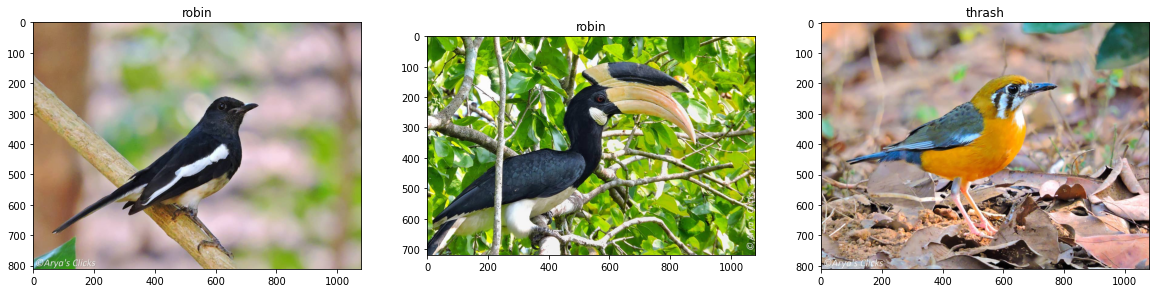

In [115]:
model_ft.eval()

inputs = []

for image in os.listdir('/content/test/'):
  inputs.append('/content/test/' + image)

input_labels = ['robin','hornbill','thrash']

with torch.no_grad():
  

  input = Image.open(inputs[0])
  fig = plt.figure(1,figsize=(20,20))
  a = fig.add_subplot(1,3,1)
  imgplot = plt.imshow(input)
  input = ToTensor()(input).unsqueeze(0) 
  #input = Variable(input)
  input = input.to(device)
  label = input_labels[0]
  output = model_ft(input)
  print(output.argmax())
  a.set_title(input_labels[output.argmax()])  

  input = Image.open(inputs[1])
  a2 = fig.add_subplot(1,3,2)
  imgplot2 = plt.imshow(input)
  input = ToTensor()(input).unsqueeze(0) 
  #input = Variable(input)
  input = input.to(device)
  label = input_labels[1]
  output = model_ft(input)
  print(output.argmax())
  a2.set_title(input_labels[output.argmax()])  

  input = Image.open(inputs[2])
  a3 = fig.add_subplot(1,3,3)
  imgplot3 = plt.imshow(input)
  input = ToTensor()(input).unsqueeze(0) 
  #input = Variable(input)
  input = input.to(device)
  label = input_labels[2]
  output = model_ft(input)
  print(output.argmax())
  a3.set_title(input_labels[output.argmax()])  


